###Loading dataset from kaggle

In [ ]:
import gdown
gdown.download(f"https://drive.google.com/uc?id=1ag6uLDcn6MJT4ikacL90Vryob1V9bZ4Q", output="davis_yol.yaml", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=19GXtOljjdfZ2N187w7Lm_rqu8keAwwCi", output="kaggle.json", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1ag6uLDcn6MJT4ikacL90Vryob1V9bZ4Q
To: /content/davis_yol.yaml
100%|██████████| 1.01k/1.01k [00:00<00:00, 835kB/s]
Downloading...
From: https://drive.google.com/uc?id=19GXtOljjdfZ2N187w7Lm_rqu8keAwwCi
To: /content/kaggle.json
100%|██████████| 70.0/70.0 [00:00<00:00, 196kB/s]


'kaggle.json'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle
!kaggle datasets download -d mrjb166/davis480p
!unzip davis480p.zip


Streaming output truncated to the last 5000 lines.
  inflating: DAVIS/Annotations/480p/horsejump-low/00059.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00000.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00001.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00002.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00003.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00004.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00005.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00006.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00007.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00008.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00009.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00010.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00011.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00012.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00013.png  
  inflating: DAVIS/Annotations/480p/kite-surf/00014.png  
  inflating: DAVI

###Converting photo data in different formats to YOLOv5 format

DAVIS dataset structure

    DAVIS/
    │
    ├── Annotations/   # Mask annotation
    │   ├── 480p/
    │   │   ├── video1/
    │   │   │   ├── 00000.png
    │   │   │   ├── 00001.png
    │   │   ├── video2/
    │   │       ├── 00000.png
    │   │       ├── 00001.png
    │
    ├── JPEGImages/   # Video frames (JPEG format)
    │   ├── 480p/
    │   │   ├── video1/
    │   │   │   ├── 00000.jpg
    │   │   │   ├── 00001.jpg
    │   │   ├── video2/
    │   │       ├── 00000.jpg
    │   │       ├── 00001.jpg
    │
    └── ImageSets/
        ├── 2017/
            ├── val.txt  
            ├── train.txt

Yolo format

    /dataset
        /images
            train.jpg
            test.jpg
            ...
        /labels
            train.txt
            test.txt
            ...


MASK (annotations) TO POLYGON (labels)

In [ ]:
import cv2
import numpy as np
import os

# Specify the path to the main folder (where the masks are stored)
main_folder_path = '/content/DAVIS/Annotations/480p'

# Specify the path to the folder where TXT files will be saved
output_folder_path = '/content/DAVIS_YOLOv5/labels'

# Create the output folder if it does not exist
os.makedirs(output_folder_path, exist_ok=True)

# Get all subfolders in the main folder
subfolders = [f.path for f in os.scandir(main_folder_path) if f.is_dir()]

# Assign a class number for each folder (based on the order)
for class_num, subfolder in enumerate(subfolders):
    # Get the name of the subfolder
    folder_name = os.path.basename(subfolder)

    # Get all mask image files in the folder
    mask_files = [f for f in os.listdir(subfolder) if f.endswith('.png')]

    for mask_file in mask_files:
        # Get the full path to the mask file
        mask_path = os.path.join(subfolder, mask_file)

        # Load the mask file
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Get the image dimensions
        height, width = mask.shape

        # Find the contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        new_filename = folder_name[:15].upper() + folder_name[-2:] + mask_file  # Add the first 15 letters of the folder name

        # Get the path for the output TXT file in the output folder
        output_path = os.path.join(output_folder_path, os.path.splitext(new_filename)[0] + '.txt')

        # Convert contours to polygons and write in YOLOv5 format
        with open(output_path, 'w') as f:
            for contour in contours:
                # Flatten the contour to a polygon
                polygon = contour.flatten().tolist()

                # Normalize the coordinates (to be in the range of 0 to 1)
                normalized_polygon = [coord / width if i % 2 == 0 else coord / height for i, coord in enumerate(polygon)]

                # YOLOv5 format: class ID and polygon coordinates
                line = f"{class_num} " + " ".join(map(str, normalized_polygon)) + "\n"
                f.write(line)

        print(f'Normalized polygon coordinates saved in {output_path}')

print("All mask files have been processed.")


Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00055.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00053.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00050.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00040.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00072.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00042.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00007.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00039.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00063.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00018.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/labels/HIKEke00013.txt
Normalized polygon coordinates saved in /content/DAVIS_YOLOv5/lab

In [ ]:
len(list(os.listdir('/content/DAVIS_YOLOv5/labels')))

3455

Identifying IDs for class name

In [ ]:
import os

# Specify the path to the folder containing the TXT files
txt_folder_path = '/content/DAVIS_YOLOv5/labels'  # Path to the folder containing the TXT files

# Get all the txt files in the folder
txt_files = [f for f in os.listdir(txt_folder_path) if f.endswith('.txt')]

# Create a dictionary to group files based on the first 3 letters
file_groups = {}

# Read and group each file
for txt_file in txt_files:
    # Get the first 3 letters of the file
    file_prefix = txt_file[:7]

    # Get the full path of the file
    txt_path = os.path.join(txt_folder_path, txt_file)

    # Read the file and get the ID
    with open(txt_path, 'r') as f:
        first_line = f.readline().strip()
        if first_line:
            id_number = first_line.split()[0]  # The first number is the ID

            # If no file exists for this prefix, add it
            if file_prefix not in file_groups:
                file_groups[file_prefix] = (txt_file, id_number)

# Print the result (file name and ID for each prefix)
for prefix, (file_name, id_number) in file_groups.items():
  print(f"ID: {id_number} , File: {file_name}" )


print("All files have been processed.")


ID: 20 , File: SCOOTER-GRAYay00065.txt
ID: 45 , File: BOATat00033.txt
ID: 28 , File: COWSws00082.txt
ID: 33 , File: MOTORBIKEke00030.txt
ID: 44 , File: CAR-ROUNDABOUTut00033.txt
ID: 26 , File: PARAGLIDINGng00038.txt
ID: 33 , File: MOTORBIKEke00007.txt
ID: 14 , File: TRAINin00028.txt
ID: 2 , File: DANCE-TWIRLrl00003.txt
ID: 29 , File: ROLLERBLADEde00027.txt
ID: 36 , File: LUCIAia00002.txt
ID: 3 , File: TENNISis00047.txt
ID: 28 , File: COWSws00011.txt
ID: 18 , File: BUSus00029.txt
ID: 33 , File: MOTORBIKEke00019.txt
ID: 30 , File: DOGog00031.txt
ID: 15 , File: CAR-TURNrn00014.txt
ID: 13 , File: DRIFT-TURNrn00023.txt
ID: 7 , File: DRIFT-CHICANEne00010.txt
ID: 26 , File: PARAGLIDINGng00068.txt
ID: 24 , File: BREAKDANCEce00053.txt
ID: 24 , File: BREAKDANCEce00043.txt
ID: 29 , File: ROLLERBLADEde00010.txt
ID: 49 , File: GOATat00039.txt
ID: 3 , File: TENNISis00051.txt
ID: 14 , File: TRAINin00057.txt
ID: 3 , File: TENNISis00038.txt
ID: 46 , File: BREAKDANCE-FLARre00063.txt
ID: 19 , File: STROL

Change the name of the photos from the folder and move them to another place

In [ ]:
import os
import shutil

# Specify the path to the image folder and the output folder
image_folder = '/content/DAVIS/JPEGImages/480p'  # Path to the main folder
output_folder = '/content/DAVIS_YOLOv5/images'  # Path to the output folder

# Create the output folder if it does not exist
os.makedirs(output_folder, exist_ok=True)

# Iterate through all subfolders inside the main folder to find JPEG files
for folder_name in os.listdir(image_folder):
    folder_path = os.path.join(image_folder, folder_name)

    # Proceed if this is a subfolder
    if os.path.isdir(folder_path):
        # Get all JPEG files in the folder
        jpeg_files = [f for f in os.listdir(folder_path) if f.endswith('.jpeg') or f.endswith('.jpg')]

        for jpeg_file in jpeg_files:
            # Add the first 3 letters of the folder name to the beginning of the file name
            new_filename = folder_name[:15].upper() + folder_name[-2:] + jpeg_file

            # Get the full path of the original file and the new path for the output file
            original_path = os.path.join(folder_path, jpeg_file)
            new_path = os.path.join(output_folder, new_filename)

            # Copy the file to the new folder
            shutil.copy(original_path, new_path)

print("All JPEG files have been copied to the output folder with new names.")


All JPEG files have been copied to the output folder with new names.


In [ ]:
len(list(os.listdir('/content/DAVIS_YOLOv5/images')))

3455

Split train and validation





In [ ]:
import os
import shutil
import random

# Specify the paths to the Image and Label folders
image_folder = '/content/DAVIS_YOLOv5/images'
label_folder = '/content/DAVIS_YOLOv5/labels'

# Specify the paths for the Train and Validation folders
train_image_folder = '/content/DAVIS_YOLOv5/images/train'
val_image_folder = '/content/DAVIS_YOLOv5/images/val'
train_label_folder = '/content/DAVIS_YOLOv5/labels/train'
val_label_folder = '/content/DAVIS_YOLOv5/labels/val'

# Create the Train and Validation folders if they do not exist
os.makedirs(train_image_folder, exist_ok=True)
os.makedirs(val_image_folder, exist_ok=True)
os.makedirs(train_label_folder, exist_ok=True)
os.makedirs(val_label_folder, exist_ok=True)

# Get all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Use a certain percentage of files for validation
val_percentage = 0.2
val_size = int(len(image_files) * val_percentage)

# Shuffle the files
random.shuffle(image_files)

# Split files into Validation and Train sets
val_files = image_files[:val_size]
train_files = image_files[val_size:]

# Copy Validation files to new folders
for val_file in val_files:
    # Copy the image file
    shutil.copy(os.path.join(image_folder, val_file), os.path.join(val_image_folder, val_file))

    # Get the name and path of the label file
    label_file = os.path.splitext(val_file)[0] + '.txt'
    shutil.copy(os.path.join(label_folder, label_file), os.path.join(val_label_folder, label_file))

# Copy Train files to new folders
for train_file in train_files:
    # Copy the image file
    shutil.copy(os.path.join(image_folder, train_file), os.path.join(train_image_folder, train_file))

    # Get the name and path of the label file
    label_file = os.path.splitext(train_file)[0] + '.txt'
    shutil.copy(os.path.join(label_folder, label_file), os.path.join(train_label_folder, label_file))

print("Files were successfully split into train and validation folders.")


Files were successfully split into train and validation folders.


###Train model

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 16953, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 16953 (delta 75), reused 101 (delta 49), pack-reused 16805 (from 1)
Receiving objects: 100% (16953/16953), 15.70 MiB | 14.16 MiB/s, done.
Resolving deltas: 100% (11613/11613), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.8/871.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
#Single-GPU
!python /content/yolov5/segment/train.py --data '/content/davis_yol.yaml' --weights yolov5s-seg.pt --img 640 --epochs 39


Streaming output truncated to the last 5000 lines.
      23/38      4.75G    0.05335    0.01751    0.01124   0.004558         93        640:  50% 86/173 [01:07<00:57,  1.51it/s]/content/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      23/38      4.75G    0.05337    0.01743    0.01122   0.004543         85        640:  50% 87/173 [01:07<00:55,  1.56it/s]/content/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      23/38      4.75G    0.05338    0.01746     0.0112   0.004548         55        640:  51% 88/173 [01:08<00:55,  1.53it/s]/content/yolov5/segment/train.py:383: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.c

###Graphical description

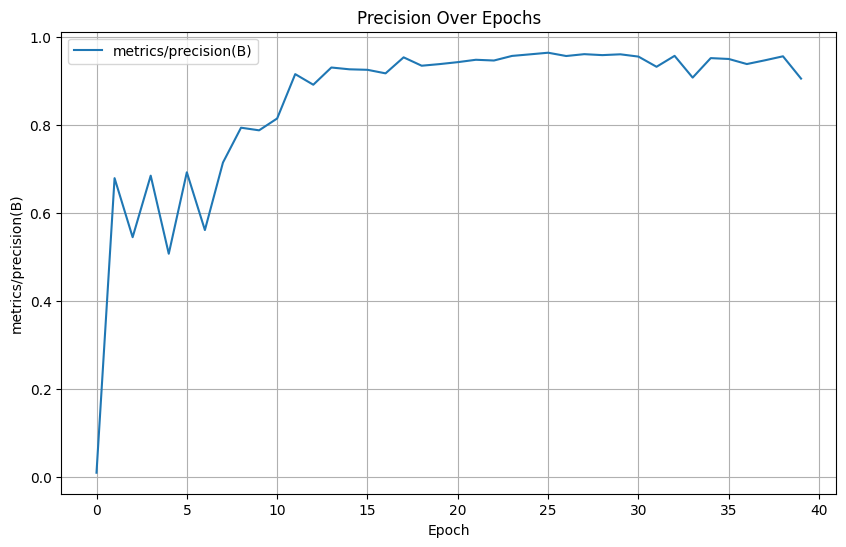

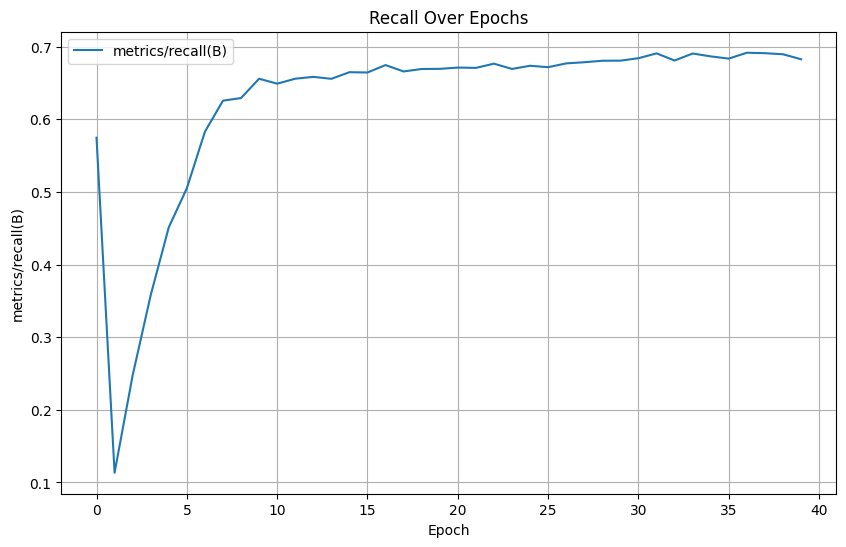

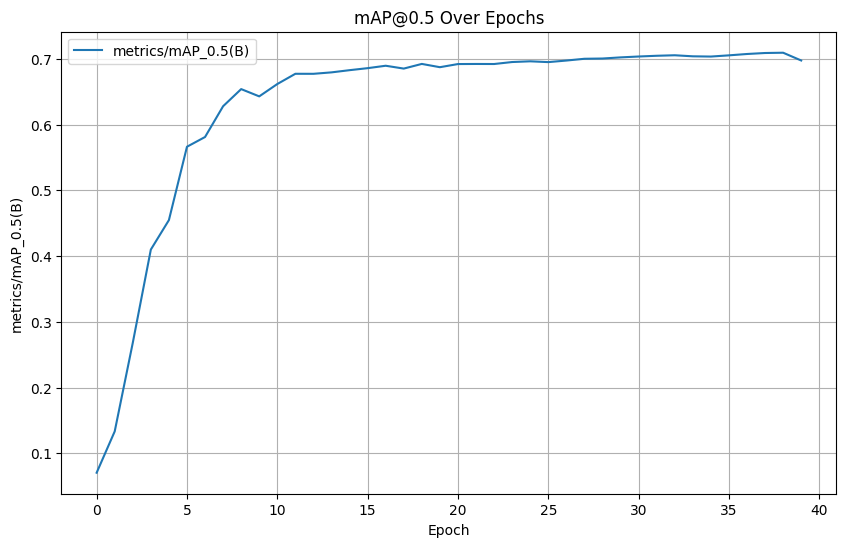

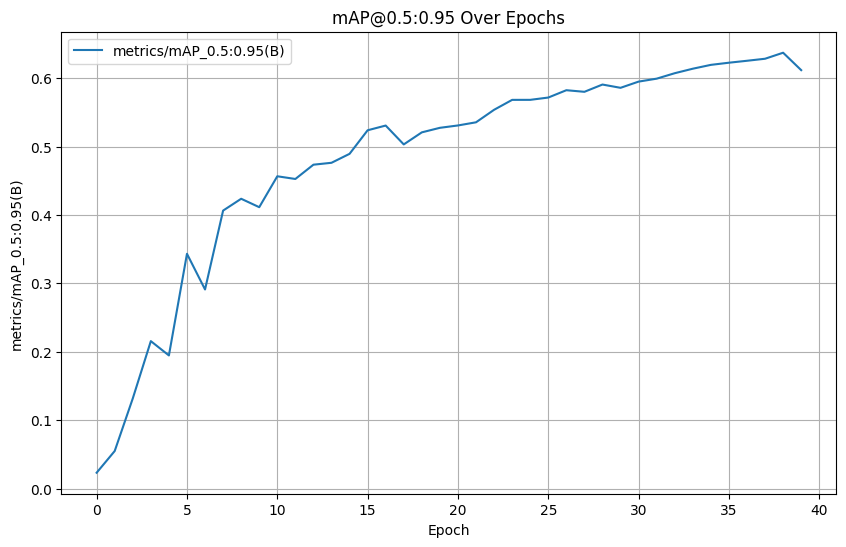

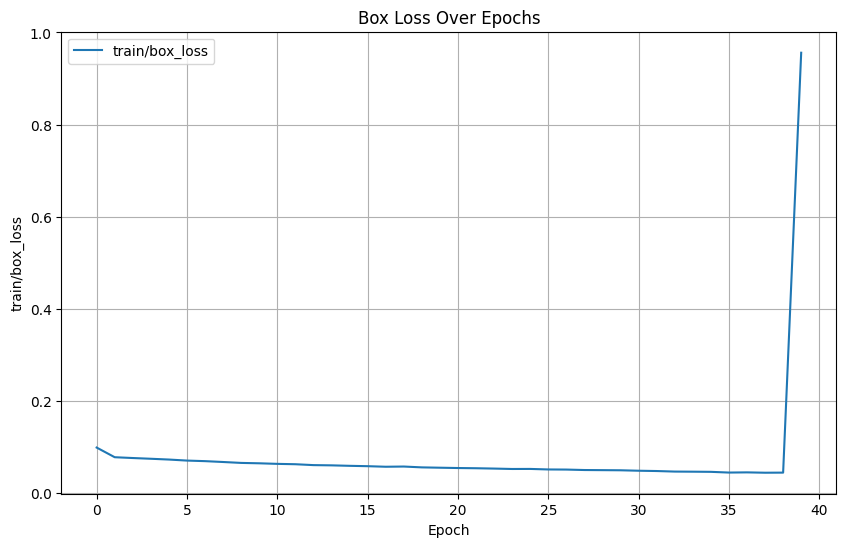

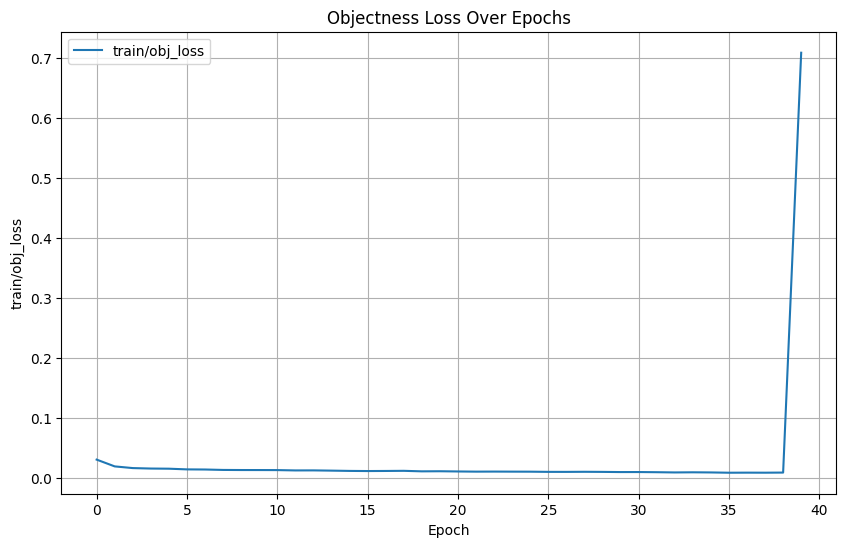

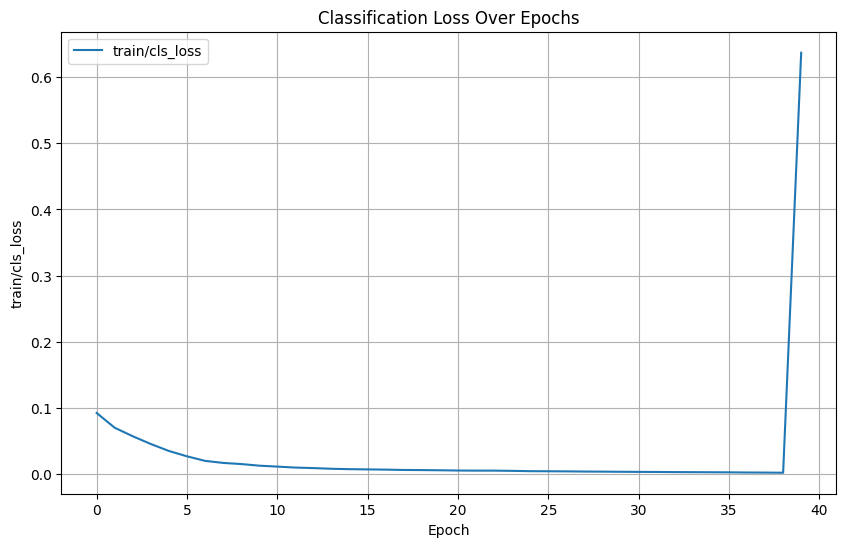

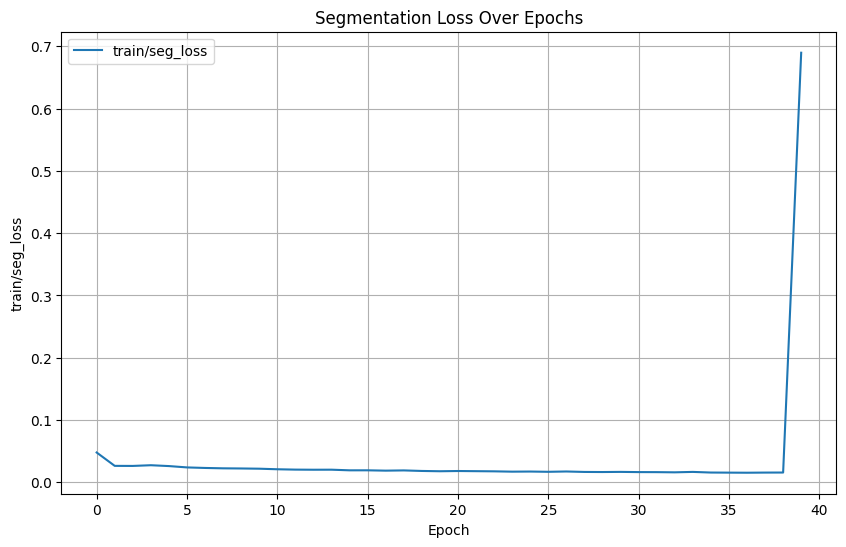

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Function to plot YOLOv5 training logs (metrics, loss, etc.)
def plot_metric(metric_name, data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data[metric_name], label=metric_name)
    plt.xlabel("Epoch")
    plt.ylabel(metric_name)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Read the training results file (adjust the path if necessary)
results_path = '/content/yolov5/runs/train-seg/exp/results.csv'

# Load the results into a DataFrame
df = pd.read_csv(results_path)

# Remove any leading or trailing whitespace from column names
df.columns = df.columns.str.strip()

# Plot some of the metrics
plot_metric('metrics/precision(B)', df, 'Precision Over Epochs')
plot_metric('metrics/recall(B)', df, 'Recall Over Epochs')
plot_metric('metrics/mAP_0.5(B)', df, 'mAP@0.5 Over Epochs')
plot_metric('metrics/mAP_0.5:0.95(B)', df, 'mAP@0.5:0.95 Over Epochs')

# # Plot loss functions
plot_metric('train/box_loss', df, 'Box Loss Over Epochs')
plot_metric('train/obj_loss', df, 'Objectness Loss Over Epochs')
plot_metric('train/cls_loss', df, 'Classification Loss Over Epochs')
plot_metric('train/seg_loss', df, 'Segmentation Loss Over Epochs')

###Evaluation

In [ ]:

!python /content/yolov5/segment/val.py --weights '/content/yolov5/runs/train-seg/exp/weights/best.pt' --data '/content/davis_yol.yaml' --img 640


segment/val: data=/content/davis_yol.yaml, weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7530575 parameters, 0 gradients, 26.1 GFLOPs
val: Scanning /content/DAVIS_YOLOv5/labels/val.cache... 691 images, 2 backgrounds, 0 corrupt: 100% 691/691 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 22/22 [00:23<00:00,  1.08s/it]
                   all        691       5634      0.958      0.689       0.71      0.636      0.918      0.678       0.69  

###Save the model

In [ ]:
# Saving model ONNX

!python /content/yolov5/export.py --weights '/content/yolov5/runs/train-seg/exp/weights/best.pt' --include onnx engine --img 640 --device 0

export: data=yolov5/data/coco128.yaml, weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=0, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx', 'engine']
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7530575 parameters, 0 gradients, 26.1 GFLOPs

PyTorch: starting from /content/yolov5/runs/train-seg/exp/weights/best.pt with output shape (1, 25200, 87) (14.7 MB)
requirements: Ultralytics requirement ['nvidia-tensorrt'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.9/340.9 MB 151.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started


###Test the model

In [ ]:
# prediction

!python /content/yolov5/segment/predict.py --weights '/content/yolov5/runs/train-seg/exp/weights/best.pt' --source '/content/DAVIS_YOLOv5/images/COWSws00092.jpg'


segment/predict: weights=['/content/yolov5/runs/train-seg/exp/weights/best.pt'], source=/content/DAVIS_YOLOv5/images/COWSws00092.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7530575 parameters, 0 gradients, 26.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/DAVIS_YOLOv5/images/COWSws00092.jpg: 384x640 5 COWSs, 34.9ms
Speed: 0.5ms pre-process, 34.9ms inference, 732.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/predict-s

Test my model

In [ ]:
import gdown
gdown.download(f"https://drive.google.com/uc?id=1N6U-fmNPQ9QtlUgyfLrojbLzTmh4XZLu", "best.pt", quiet=False)
#gdown.download(f'https://drive.google.com/uc?id=1WFo6kXbteNhKaJHpTECuvVCr-F4Xg2X3', 'best.onnx', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1N6U-fmNPQ9QtlUgyfLrojbLzTmh4XZLu
To: /content/best.pt
100%|██████████| 15.4M/15.4M [00:00<00:00, 76.9MB/s]


'best.pt'

In [ ]:
# prediction

!python /content/yolov5/segment/predict.py --weights '/content/best.pt' --source '/content/DAVIS_YOLOv5/images/BEARar00002.jpg'


segment/predict: weights=['/content/best.pt'], source=/content/DAVIS_YOLOv5/images/BEARar00002.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7530575 parameters, 0 gradients, 26.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/DAVIS_YOLOv5/images/BEARar00002.jpg: 384x640 2 BEARs, 61.4ms
Speed: 0.6ms pre-process, 61.4ms inference, 1149.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/predict-seg/exp2


###Integrate Tracking

In [ ]:
import gdown

gdown.download(f"https://drive.google.com/uc?id=1_gBMi_FUTVvdLpC6S0lESCXWdSfDdmQB", "sort.py", quiet=False)
gdown.download(f'https://drive.google.com/uc?id=15LW_byqFgdTEEDAHIKMTwD3CCZMCCnzb', 'best_model.pt', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1X_4Or6xglYTGIZBZ0Bh5K8lZJ1Lm-tEZ
From (redirected): https://drive.google.com/uc?id=1X_4Or6xglYTGIZBZ0Bh5K8lZJ1Lm-tEZ&confirm=t&uuid=fc970a70-6e39-4235-be62-6a1299e52e24
To: /content/sort.py
100%|██████████| 2.73k/2.73k [00:00<00:00, 9.19MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=15LW_byqFgdTEEDAHIKMTwD3CCZMCCnzb
From (redirected): https://drive.google.com/uc?id=15LW_byqFgdTEEDAHIKMTwD3CCZMCCnzb&confirm=t&uuid=5d3987bd-224d-4ba0-8336-4d592c359c37
To: /content/best_model.pt
100%|██████████| 58.4M/58.4M [00:02<00:00, 21.8MB/s]


'best_model.pt'

SORT

In [ ]:
# Video processing part
from sort import Sort
import torch
import cv2
import numpy as np

# Modeli öz train etdiyiniz çəkilər ilə yükləyin
model = torch.hub.load('yolov5', 'custom', path='/content/best_model.pt', source='local')

tracker = Sort()

# Load test video
video = input('Video path:')
cap = cv2.VideoCapture(video)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Initialize VideoWriter to save the output
out = cv2.VideoWriter('/content/output_video.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Get results from the YOLOv5 model
    results = model(frame)
    detections = results.xyxy[0].cpu().numpy()  # YOLOv5 detections (x1, y1, x2, y2, score, class)

    # Sort tracker expects (x1, y1, x2, y2, score) format
    tracked_objects = tracker.update(detections[:, :5])

    # Draw bounding boxes and IDs
    for track in tracked_objects:
        # Get the bounding box coordinates from the track
        bbox = track.bbox
        x1, y1, x2, y2 = int(bbox[0]), int(bbox[1]), int(bbox[2]), int(bbox[3])
        track_id = track.id

        # Draw rectangle and ID on the frame
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {int(track_id)}', (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Write the frame into the output video
    out.write(frame)

# Release the video capture and writer
cap.release()
out.release()
cv2.destroyAllWindows()

YOLOv5 🚀 v7.0-363-gf44db010 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


Video path:/content/Shopping, People, Commerce, Mall, Many, Crowd, Walking   Free Stock video footage   YouTube.mp4


/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
WARNING ⚠️ NMS time limit 0.550s exceeded
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/content/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast)

In [ ]:
import gdown

gdown.download(f"https://drive.google.com/uc?id=17wnR09ioguu4F4p1ekDUyruqmsC2LrNS", "/content/yolov5/segment/predict_sort.py", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1_gBMi_FUTVvdLpC6S0lESCXWdSfDdmQB", "/content/yolov5/segment/sort.py", quiet=False)
gdown.download(f"https://drive.google.com/uc?id=1yOguzIiqQxe7Z2NYMCHoQSDRuwAHt2Wx", "car.mp4", quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=17wnR09ioguu4F4p1ekDUyruqmsC2LrNS
From (redirected): https://drive.google.com/uc?id=17wnR09ioguu4F4p1ekDUyruqmsC2LrNS&confirm=t&uuid=05fa5337-dced-45b0-bd25-7fbb98bad294
To: /content/yolov5/segment/predict_sort.py
100%|██████████| 17.6k/17.6k [00:00<00:00, 30.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1_gBMi_FUTVvdLpC6S0lESCXWdSfDdmQB
From (redirected): https://drive.google.com/uc?id=1_gBMi_FUTVvdLpC6S0lESCXWdSfDdmQB&confirm=t&uuid=5e8674b1-a74d-4b67-8f1c-1124b2a72eee
To: /content/yolov5/segment/sort.py
100%|██████████| 3.66k/3.66k [00:00<00:00, 3.44MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yOguzIiqQxe7Z2NYMCHoQSDRuwAHt2Wx
To: /content/car.mp4
100%|██████████| 3.23M/3.23M [00:00<00:00, 23.3MB/s]


'car.mp4'

In [ ]:
!python /content/yolov5/segment/predict_sort.py --weights '/content/best.pt' --source '/content/car.mp4'

segment/predict_sort: weights=['/content/best.pt'], source=/content/car.mp4, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-364-g4d39325f Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7530575 parameters, 0 gradients, 26.1 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
video 1/1 (1/80) /content/car.mp4: 384x640 1 CAR-TURN, 33.6ms
video 1/1 (2/80) /content/car.mp4: 384x640 1 CAR-TURN, 11.6ms
video 1/1 (3/80) /content/car.mp4: 384x640 1 CAR-TURN, 10.5ms
video 1/1 (4/80) /content/car.mp4: 384x640 1 CAR-TURN, 9.8ms
video 1/1 (5/80) /co